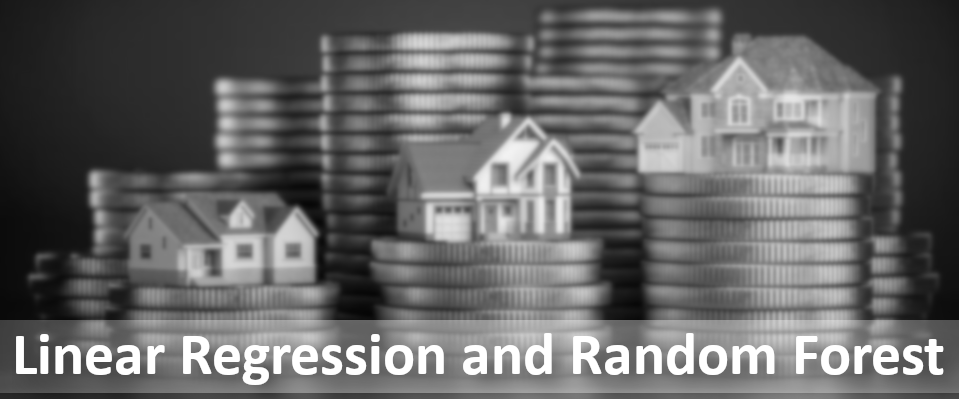

# 1. Introdução

Para o presente projeto, fora selecionado o *Dataset* disponível em [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/), que contém os dados históricos do mercado imobiliário entre o ano de 2012 e 2013, do distrito de Sindian, na cidade de New Taipei em Taiwan. Cada registro descreve a transação de uma propriedade imobiliária. O conjunto de dados contém 414 registros de vendas de imóveis. **Serão aplicados os algoritmos de Regressão Linear e Random Forest para prever o custo das casas.**

## 1.1. Descrição das Variáveis

| **Variável** |                                 **Descrição**                                 |
|:--------:|:-------------------------------------------------------------------------:|
|    **No**    |                    Código de identificação do registro.                   |
|    **X1**    |                         Data de transação da casa.                        |
|    **X2**    |                           Idade da casa em anos.                          |
|    **X3**    | Distância da casa até a estação de metrô mais próxima. (medida em metros) |
|    **X4**    |                    Quantidade de lojas próximas à casa.                   |
|    **X5**    |                      Coordenadas de latitude da casa.                     |
|    **X6**    |                     Coordenadas de longitude da casa.                     |
|     **Y**    |                 Preço de venda da casa. (variável target)                 |

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 2. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 3. Carregamento do Dataset

In [2]:
df = pd.read_csv('real_valuation.csv', sep=';')

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 4. Visualização Geral dos Dados do DataFrame

In [3]:
# Visualização das primeiras linhas do DataFrame (DF)
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,"2012,917",32,"84,87882",10,"24,98298","121,54024","37,9"
1,2,"2012,917","19,5","306,5947",9,"24,98034","121,53951","42,2"
2,3,"2013,583","13,3","561,9845",5,"24,98746","121,54391","47,3"


In [4]:
# Tamanho da base de dados (414 linhas por 8 colunas)
df.shape

(414, 8)

In [5]:
# Informações básicas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   No                                      414 non-null    int64 
 1   X1 transaction date                     414 non-null    object
 2   X2 house age                            414 non-null    object
 3   X3 distance to the nearest MRT station  414 non-null    object
 4   X4 number of convenience stores         414 non-null    int64 
 5   X5 latitude                             414 non-null    object
 6   X6 longitude                            414 non-null    object
 7   Y house price of unit area              414 non-null    object
dtypes: int64(2), object(6)
memory usage: 26.0+ KB


In [6]:
# Visualização das variáveis númericas do DF (Apenas a X4)
df.describe()

,No,X4 number of convenience stores
count,414.000000,414.000000
mean,207.500000,4.094203
std,119.655756,2.945562
min,1.000000,0.000000
25%,104.250000,1.000000
50%,207.500000,4.000000
75%,310.750000,6.000000
max,414.000000,10.000000


In [7]:
# Visualização das variáveis categóricas do DF
df.describe(include='O')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
count,414,414,414,414,414,414
unique,12,236,259,234,232,270
top,"2013,417",0,"289,3248","24,97433","121,54348","42,5"
freq,58,17,13,14,13,4


## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 5. Tratamento dos Dados

## 5.1. Exclusão da Coluna "No"

In [8]:
df.drop(['No'], axis=1, inplace=True)

In [9]:
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,"2012,917",32,"84,87882",10,"24,98298","121,54024","37,9"
1,"2012,917","19,5","306,5947",9,"24,98034","121,53951","42,2"
2,"2013,583","13,3","561,9845",5,"24,98746","121,54391","47,3"


## 5.2. Renomeação das Colunas do DataFrame

In [10]:
colunas = ['DateTransaction', 'AgeHouse', 'DistanceMRT', 'NumberStores', 'Lat', 'Long', 'Price']
df.columns = colunas

In [11]:
# Visualização das primeiras linhas do DF após o tratamento
df.head(3)

,DateTransaction,AgeHouse,DistanceMRT,NumberStores,Lat,Long,Price
0,"2012,917",32,"84,87882",10,"24,98298","121,54024","37,9"
1,"2012,917","19,5","306,5947",9,"24,98034","121,53951","42,2"
2,"2013,583","13,3","561,9845",5,"24,98746","121,54391","47,3"


## 5.3. Transformação das Variáveis em Float

In [12]:
for coluna in colunas:   
    df[coluna] = df[coluna].astype(str)
    df[coluna] = df[coluna].str.replace(',', '.')
    df[coluna] = df[coluna].astype(float)

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 6. Exploração dos Dados

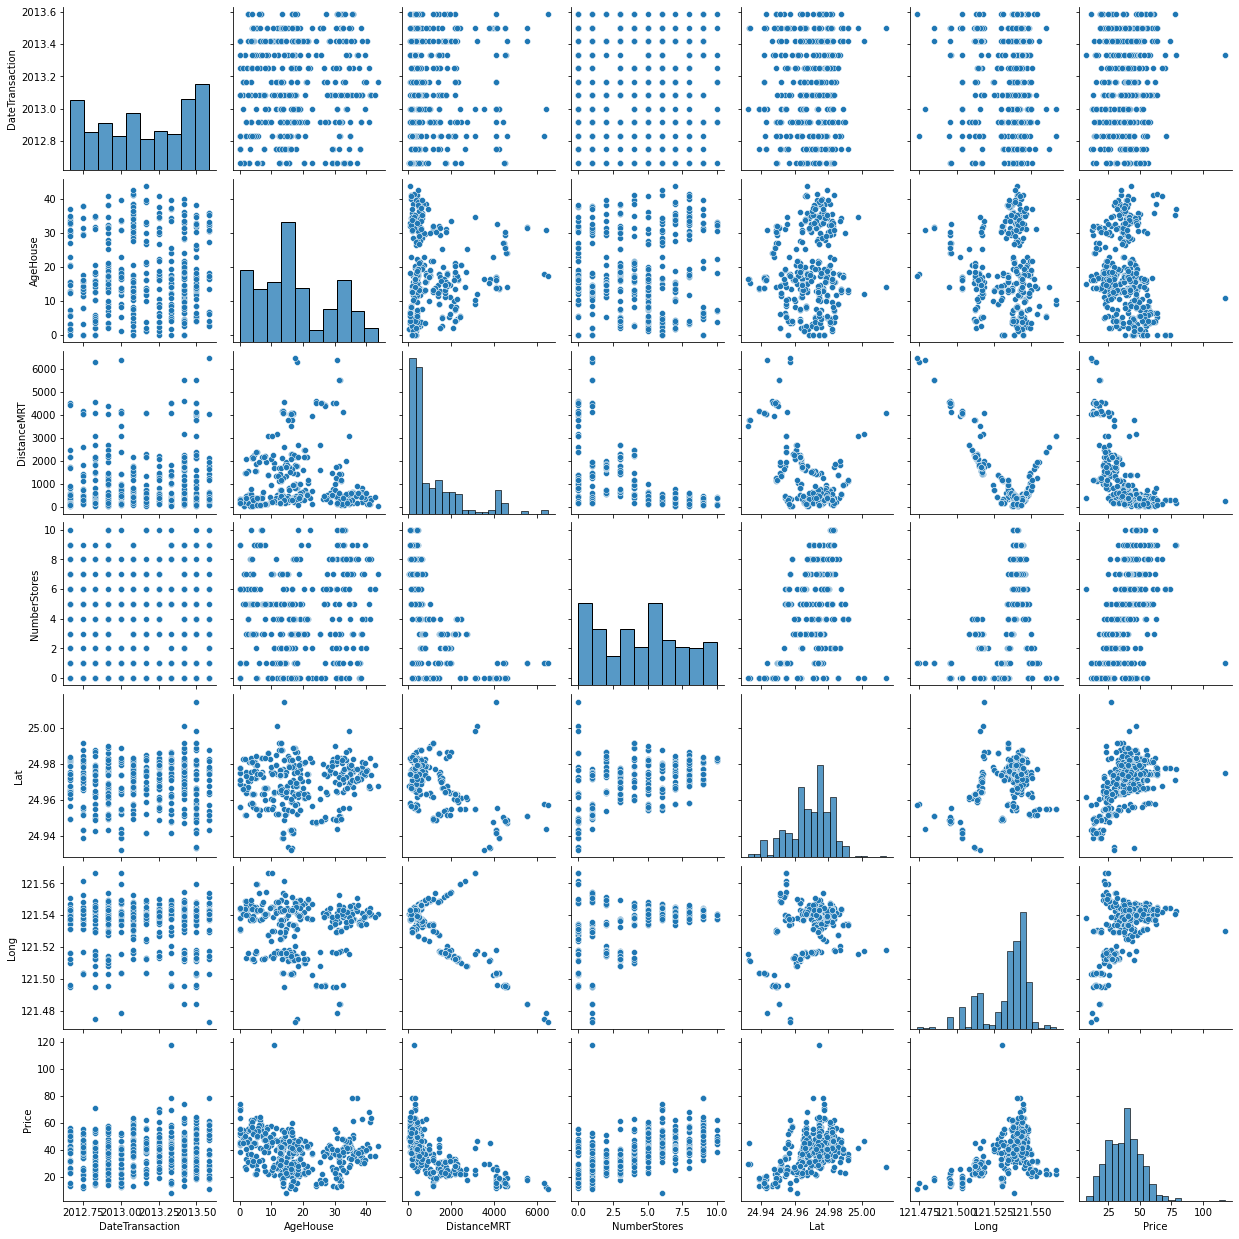

In [13]:
# Visualização geral da correlação das variáveis
sns.pairplot(df);

<AxesSubplot:>

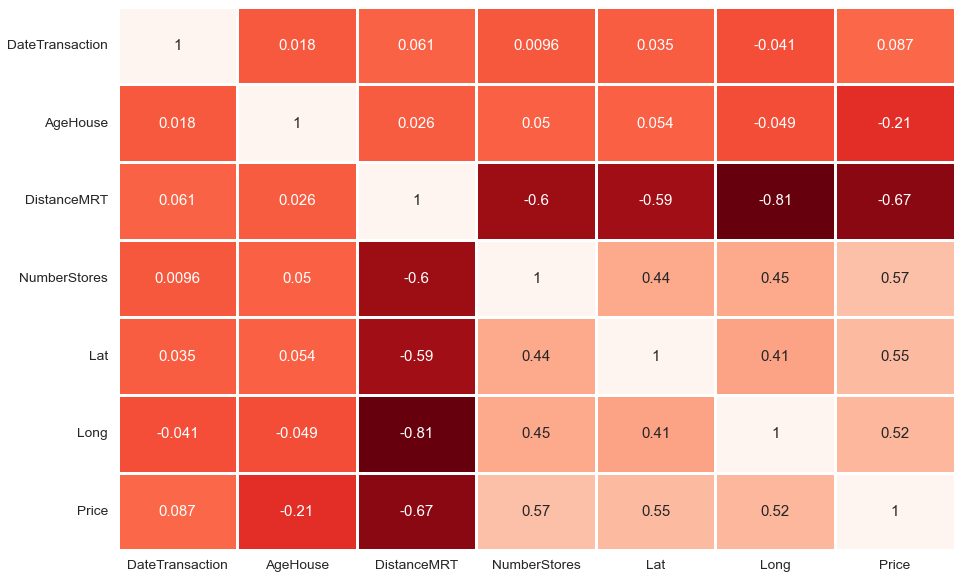

In [14]:
# Visualização da correlação das colunas no dataframe de forma mais detalhada
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(df.corr(), annot=True, cbar=False, linewidths=2.5, cmap='Reds_r')

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 7. Machine Learning

## 7.1. Linear Regression

### 7.1.1. Linear Regression Simples - Selecionando a variável com maior correspondência (DistanceMRT) e aplicando uma Regressão Linear Simples.

In [15]:
# Divisão das variáveis entre explanatória e target
X_regressaoSimples = pd.DataFrame(df['DistanceMRT'])
y_regressaoSimples = df['Price']

In [16]:
# Divisão entre treino e teste
X_regressaoTreinamento, X_regressaoTeste, y_regressaoTreinamento, y_regressaoTeste = train_test_split(X_regressaoSimples,
                                                                                                      y_regressaoSimples,
                                                                                                      test_size=0.2,
                                                                                                      random_state=0)

In [17]:
# Construção e treinamento do modelo
modeloRegressaoSimples = LinearRegression()
modeloRegressaoSimples.fit(X_regressaoTreinamento, y_regressaoTreinamento);

In [18]:
# Valores Resultantes
valorB0 = modeloRegressaoSimples.intercept_
valorB1 = modeloRegressaoSimples.coef_

print(f'Valor do Intercept (B0): {valorB0}\nValor de B1: {valorB1[0]}')

Valor do Intercept (B0): 45.96544468311136
Valor de B1: -0.007221278463672805


In [19]:
# Realizando a previsão na base de testes
previsaoModeloRegressaoSimples = modeloRegressaoSimples.predict(X_regressaoTeste)

In [20]:
# Verificando as métricas
MAE = metrics.mean_absolute_error(y_regressaoTeste, previsaoModeloRegressaoSimples)
MSE = metrics.mean_squared_error(y_regressaoTeste, previsaoModeloRegressaoSimples)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 6.950492770030216
MSE: 84.07881525233277
RMSE: 9.16945010632223


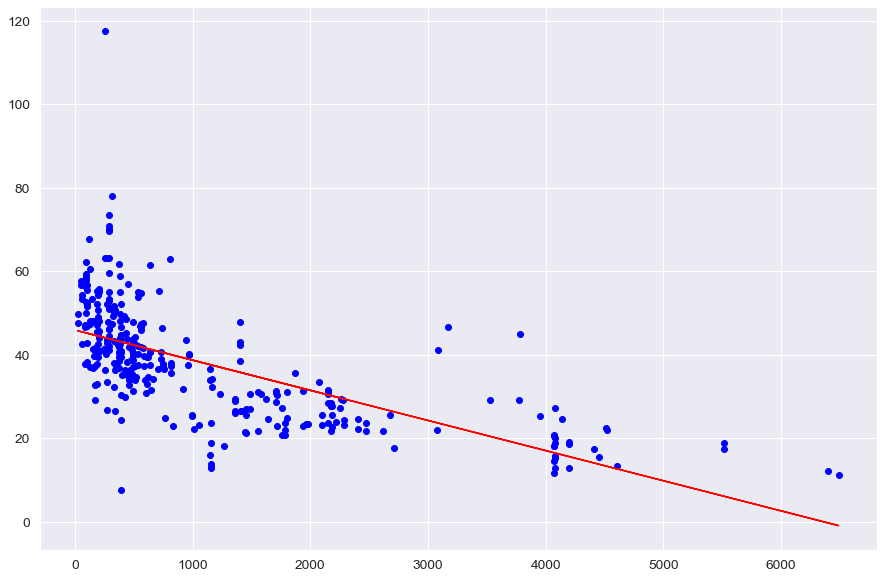

In [21]:
plt.figure(figsize=(15, 10))
plt.scatter(X_regressaoTreinamento, y_regressaoTreinamento, color='blue')
plt.plot(X_regressaoTreinamento, modeloRegressaoSimples.predict(X_regressaoTreinamento), color='red');

In [22]:
casa20Metros = modeloRegressaoSimples.predict([[20]])
casa1000Metros = modeloRegressaoSimples.predict([[1000]])
casa6000Metros = modeloRegressaoSimples.predict([[6000]])

print(f'Uma casa à distância de 20m da estação de metro custará cerca de {np.round(casa20Metros, 2)[0]}')
print(f'Uma casa à distância de 1km da estação de metro custará cerca de {np.round(casa1000Metros, 2)[0]}')
print(f'Uma casa à distância de 6km da estação de metro custará cerca de {np.round(casa6000Metros, 2)[0]}')

Uma casa à distância de 20m da estação de metro custará cerca de 45.82
Uma casa à distância de 1km da estação de metro custará cerca de 38.74
Uma casa à distância de 6km da estação de metro custará cerca de 2.64


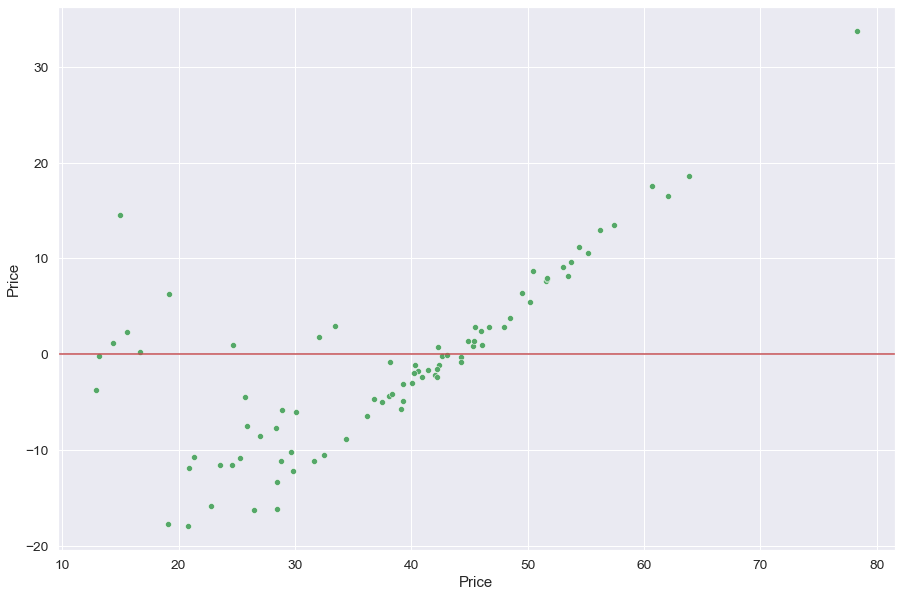

In [23]:
test_residuals = y_regressaoTeste - previsaoModeloRegressaoSimples
plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_regressaoTeste, y=test_residuals, color='g')
plt.axhline(y=0, color='r', ls='-');

### 7.1.2. Linear Regression Multiple

In [24]:
# Divisão das variáveis entre explanatórias e target
X_regressao = df.drop(['DateTransaction', 'Price'], axis=1)
y_regressao = df['Price']

In [25]:
# Escalonamento dos valores
scaler = preprocessing.StandardScaler().fit(X_regressao)
X_regressao = scaler.transform(X_regressao)

In [26]:
# Divisão entre treino e teste
X_regressaoTreinamento, X_regressaoTeste, y_regressaoTreinamento, y_regressaoTeste = train_test_split(X_regressao,
                                                                                                      y_regressao,
                                                                                                      test_size=0.2,
                                                                                                      random_state=0)

In [27]:
# Construção e treinamento do modelo
modeloRegressaoMultipla = LinearRegression()
modeloRegressaoMultipla.fit(X_regressaoTreinamento, y_regressaoTreinamento);

In [28]:
# Valores Resultantes
valorB0 = modeloRegressaoMultipla.intercept_
valorB1 = modeloRegressaoMultipla.coef_

print(f'Valor do Intercept (B0): {valorB0}')
print(f'Valores dos coeficientes: {valorB1}')

Valor do Intercept (B0): 38.07452311336335
Valores dos coeficientes: [-3.01524827 -5.22625894  3.33009576  2.97376443 -0.01894036]


In [29]:
# Realizando a previsão na base de testes
previsaoModeloRegressaoMultipla = modeloRegressaoMultipla.predict(X_regressaoTeste)

In [30]:
# Verificando as métricas
MAE = metrics.mean_absolute_error(y_regressaoTeste, previsaoModeloRegressaoMultipla)
MSE = metrics.mean_squared_error(y_regressaoTeste, previsaoModeloRegressaoMultipla)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 5.745927475462528
MSE: 62.17223562241417
RMSE: 7.884937261793157


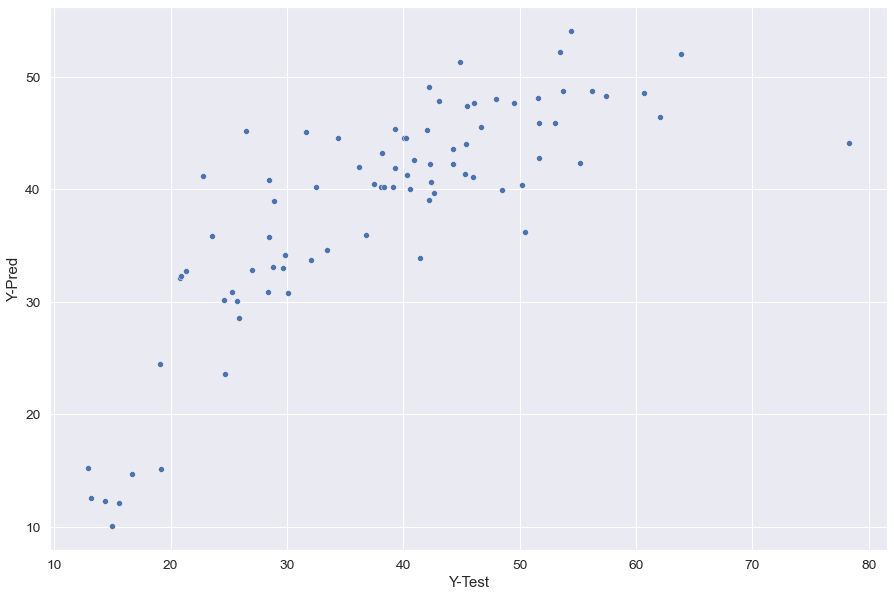

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_regressaoTeste, y=previsaoModeloRegressaoMultipla)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred');

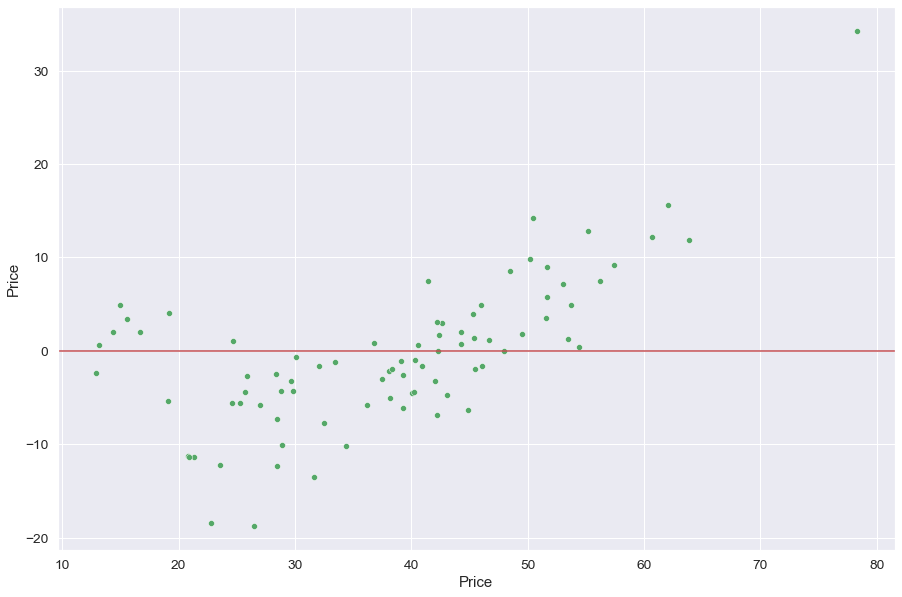

In [32]:
test_residuals = y_regressaoTeste - previsaoModeloRegressaoMultipla
plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_regressaoTeste, y=test_residuals, color='g')
plt.axhline(y=0, color='r', ls='-');

# 7.2. Random Forest

### 7.2.1. Random Forest Simples - Selecionando a variável com maior correspondência (DistanceMRT) e aplicando uma Regressão Linear Simples.

In [33]:
# Divisão das variáveis entre explanatória e target
X = np.array(df['DistanceMRT']).reshape(-1, 1)
y = np.array(df['Price']).reshape(-1, 1)

In [34]:
# Dividindo o Dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Construção e treinamento do modelo
RandomForestModel = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
RandomForestModel.fit(X_train, y_train);

In [36]:
# Verificando o score sobre a base de teste
RandomForestModel.score(X_test, y_test)

0.6938126533653394

In [37]:
# Realizando a previsão na base de testes
previsoes = RandomForestModel.predict(X_test)

In [38]:
# Verificando as métricas
MAE = metrics.mean_absolute_error(y_test, previsoes)
MSE = metrics.mean_squared_error(y_test, previsoes)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 5.317312252814433
MSE: 53.1844398787731
RMSE: 7.292766270680358


In [39]:
casa20Metros = RandomForestModel.predict([[20]])
casa1000Metros = RandomForestModel.predict([[1000]])
casa6000Metros = RandomForestModel.predict([[6000]])

print(f'Uma casa à distância de 20m da estação de metro custará cerca de {np.round(casa20Metros, 2)[0]}')
print(f'Uma casa à distância de 1km da estação de metro custará cerca de {np.round(casa1000Metros, 2)[0]}')
print(f'Uma casa à distância de 6km da estação de metro custará cerca de {np.round(casa6000Metros, 2)[0]}')

Uma casa à distância de 20m da estação de metro custará cerca de 50.02
Uma casa à distância de 1km da estação de metro custará cerca de 27.96
Uma casa à distância de 6km da estação de metro custará cerca de 17.44


### 7.2.2. Random Forest

In [40]:
# Divisão das variáveis entre explanatórias e target
X_all = df.drop(['DateTransaction', 'Price'], axis=1)
y_all = df['Price']

In [41]:
# Dividindo o Dataset entre treino e teste
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.2, random_state = 0)

In [42]:
# Construção e treinamento do modelo
RandomForestModelAll = RandomForestRegressor(n_estimators = 250, max_depth=5, random_state=0)
RandomForestModelAll.fit(X_train_all, y_train_all);

In [43]:
# Verificando o score sobre a base de teste
RandomForestModelAll.score(X_test_all, y_test_all)

0.7234391542581824

In [44]:
# Realizando a previsão na base de testes
previsoes_all = RandomForestModelAll.predict(X_test_all)

In [45]:
# Verificando as métricas

MAE = metrics.mean_absolute_error(y_test_all, previsoes_all)
MSE = metrics.mean_squared_error(y_test_all, previsoes_all)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 4.918433319500568
MSE: 48.038345917438065
RMSE: 6.9309700560194365


In [46]:
casa1 = [5.6,90.45606,9.0,24.97433,121.54310]
casa1Predict = RandomForestModelAll.predict([casa1])[0]

print(f'A casa 1 custará cerca de {np.round(casa1Predict, 2)}')

A casa 1 custará cerca de 55.57


## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


# 8. Conclusões

* A variável "DistanceMRT" (Distância da casa até a estação de metrô mais próxima. (medida em metros)) e a variável "Price" foram as que tiveram uma maior correlação. Uma correlação moderada negativa, ou seja, quanto **maior** a distância até uma estação de metrô **menor** será o preço do imóvel;


* O algoritmo que obteve o melhor desempenho em relação às métricas foi o Random Forest, utilizando todas as variáveis exceto a 'DateTransaction', com os seguintes parâmetros: (n_estimators = 250, max_depth=5), alcançado um valor de erro absoluto em cerca de 5;


* O algoritmo que obteve o pior resultado em relação às métricas doi o Linear Regression, utilizando apenas a variável "DistanceMRT", embora seja a variável com a maior correlação (negativa), a correlação não é forte o suficiente para alcançarmos resultados satisfatórios, uma vez que o seu MSE foi de quase 90;


* Acredito que seria importante ter a metragem quadrada explicita como variável para que a predição dos valores fosse mais precisa;


* Em que pese as limitações apontadas, fico satisfeito com os resultados ora expostos.

## <center> --------------------------------------------------------------------------------------------------------------------------- </center>


|  	| Contatos 	|  	|
|:---:	|:---:	|:---:	|
| <img width=40 align='center' alt='Thiago Ferreira' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" /> 	| <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" /> 	| <img width=40 align='center' src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/facebook/facebook-original.svg" /> 	|
| [Linkedin](https://www.linkedin.com/in/tferreirasilva/) 	| [Github](https://github.com/ThiagoFerreiraWD) 	| [Facebook](https://www.facebook.com/thiago.ferreira.50746) 	|
|  	| Autor: **Thiago Ferreira** 	|  	|